# Color schemes

Color space indicates the color scheme of images. Most of the images is in RGB color space. 

In [30]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np

(1667, 1317, 3)


/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


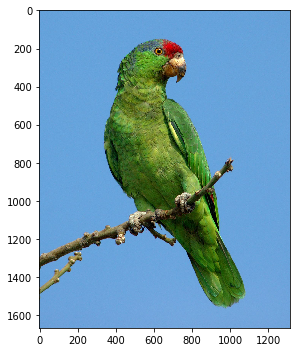

In [10]:
img = imread('Red_Crowned_Amazon.jpg')
print(img.shape)
plt.figure(figsize=(5,5))
imshow(img)

Now you have 3 channels of RGB.

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


Text(0.5,1,'BLUE')

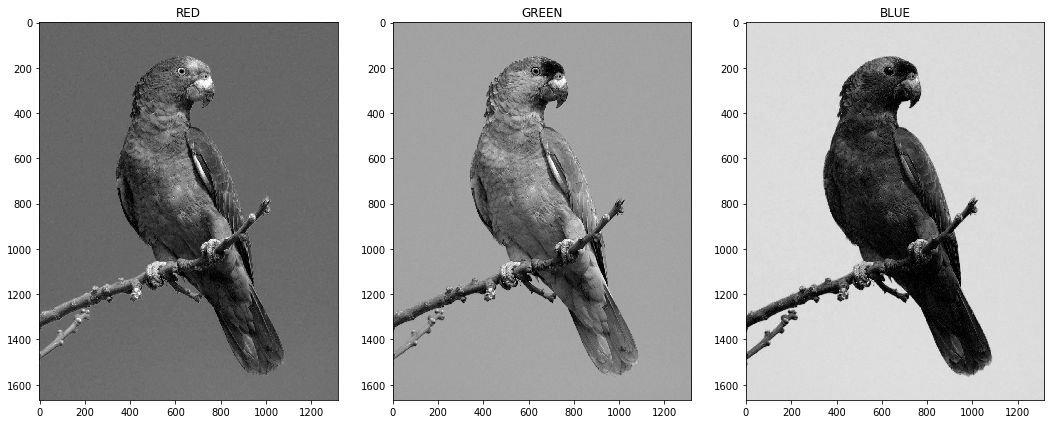

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(131)
imshow(img[...,0])
plt.title('RED')
plt.subplot(132)
imshow(img[...,1])
plt.title('GREEN')
plt.subplot(133)
imshow(img[...,2])
plt.title('BLUE')

Despite of the parrot is green it is difficult to segment it from background. Because the bacground is sky blue and it consists of green and blue component.
But we see that the parrot in blue channel is black but the background is white.
Now we can get the parrot mask.

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


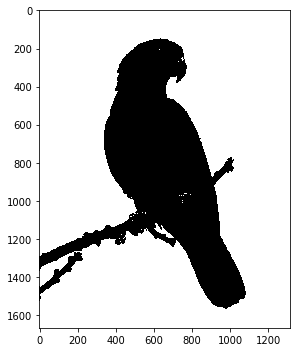

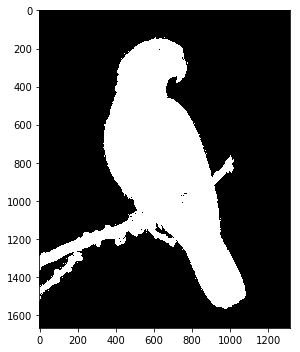

In [38]:
plt.figure(figsize=(5,5))
imshow(img[...,2] > 200)
plt.figure(figsize=(5,5))
imshow(np.bitwise_not(img[...,2] > 210))

You see that the stick belongs to the parrot mask. It is difficult to excule the stick in RGB. You can try it.
Find a gray image for the RGB image.
The new image is obtained by summation of channels with weights.

$Y = 0.2125 \times R + 0.7154 \times G + 0.0721 \times B$,
whre R - red component, G - green component, B - blue component, Y - the gray image.

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


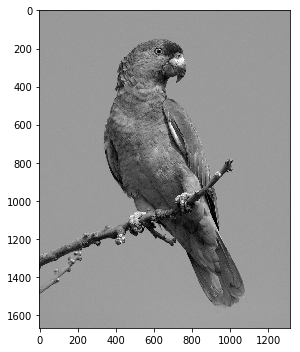

In [44]:
from skimage.color import rgb2gray
plt.figure(figsize=(5,5))
imshow(rgb2gray(img))

Another color scheme is HSV. H - hue, S - saturation, V - value. Now we will use only H component for finding the parrot.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/HSV_color_solid_cylinder_saturation_gray.png/1280px-HSV_color_solid_cylinder_saturation_gray.png' width=400 height=400>

H is changing in [0, 1] (red to yellow to green to blue to purple)

0 is the red color.
1 is the purple color.

The green color belongs to []

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


Text(0.5,1,'VALUE')

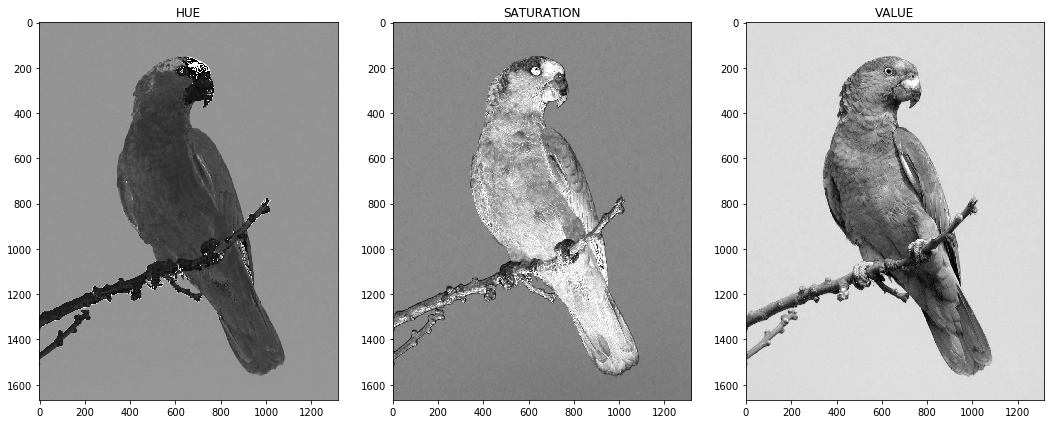

In [58]:
from skimage.color import rgb2hsv
plt.figure(figsize=(15,6))
img_hsv = rgb2hsv(img)
plt.subplot(131)
imshow(img_hsv[...,0])
plt.title('HUE')
plt.subplot(132)
imshow(img_hsv[...,1])
plt.title('SATURATION')
plt.subplot(133)
imshow(img_hsv[...,2])
plt.title('VALUE')

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


Text(0.5,1,'Green color')

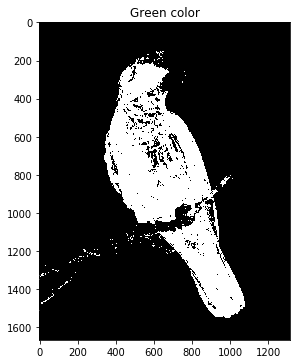

In [97]:
plt.figure(figsize=(5,5))
green_color = np.bitwise_and(img_hsv[...,0] > 0.20, img_hsv[...,0] < 0.35)
imshow(green_color)
plt.title('Green color')

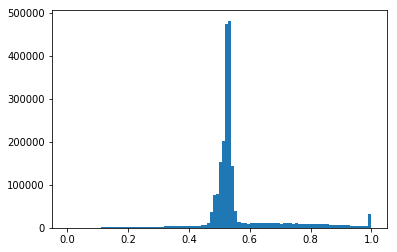

In [109]:
plt.hist(img_hsv[...,1].ravel(), bins=100);

We see that the parrot has a red lobe.

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


Text(0.5,1,'RED color')

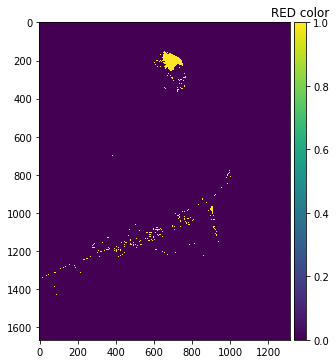

In [98]:
plt.figure(figsize=(5,5))
red_color = np.bitwise_or(img_hsv[...,0] > 0.9, img_hsv[...,0] < 0.05)
imshow(red_color)
plt.title('RED color')

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


Text(0.5,1,'All together')

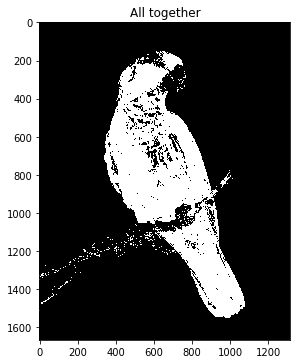

In [102]:
plt.figure(figsize=(5,5))
mask = np.bitwise_or(green_color, red_color)
imshow(mask)
plt.title('All together')

In [116]:
from scipy.ndimage.morphology import binary_fill_holes

/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/vasily/.virtualenvs/keras/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


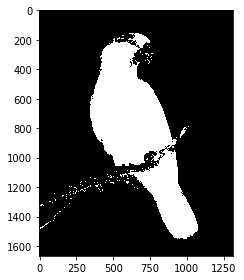

In [117]:
imshow(binary_fill_holes(mask))

## Task
Try to segment animals on the three additional images.